[확률적 NMF 행렬 분해](https://velog.io/@mineru/%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C%EC%9D%B4%EB%9E%80)


- 콘텐츠 기반 필터링 : 상품 특징의 유사도
- 협업 필터링 : user가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행
1. **최근접 이웃 협업 필터링**:
   - 최근접 이웃 협업 필터링은 사용자나 상품 간의 유사성을 기반으로 추천을 수행합니다.
   - 사용자 기반 최근접 이웃 필터링은 유사한 사용자들이 좋아하는 항목을 기반으로 추천을 제공합니다.
   - 상품 기반 최근접 이웃 필터링은 유사한 상품들(아이템이 가지는 속성)을 기반이 아닌, 사용자들이 그 아이템을 좋아하는지/싫어하는지의 척도로 추천을 제공합니다. => 아이템에 대한 사람들의 평가가 비슷한 아이템을 찾아서 추천
   - 이 기술은 즉시 이해하기 쉽고 구현하기도 비교적 쉬우며 작은 데이터셋에도 잘 동작합니다.
   - 사용자 기반에서는 행렬에서 행이 사용자, 열이 상품이었다면, 상품 기반에서는 행에 상품들이 있고, 열에 사용자가 있어, 해당 상품을 어떤 고객에게 추천할 지를 분석 <=> 반대로, 사용자 기반에서는 해당 사용자에게 어떤 상품을 추천할 지를 분석

2. **잠재 요인 협업 필터링**
   - 잠재 요인 협업 필터링은 매트릭스 분해(matrix factorization)를 사용하여 사용자와 상품의 잠재 요인을 학습하여 추천을 수행합니다.
   - 이 방법은 많은 데이터와 대규모의 사용자와 항목에 적합하며 희소한 데이터셋에서도 잘 작동합니다.
   - 주요 장점 중 하나는 특징(잠재 요인)을 추출하여 더 나은 추천을 할 수 있다는 것입니다.
   - 주로 행렬 분해 기법을 사용하며, 대표적으로 SVD(Singular Value Decomposition)나 ALS(Alternating Least Squares) 등의 알고리즘이 있습니다.
   - 행렬 분해에 의해 추출되는 "잠재 요인"이 정확히 어떤 것인지는 알 수 없다.

- 이러한 두 가지 기술은 각각 장단점이 있으며, 어떤 것을 사용할지는 데이터의 특성과 추천 시스템의 목적에 따라 달라집니다. 예를 들어, 최근접 이웃 협업 필터링은 희소한 데이터셋에서도 잘 동작할 수 있지만, 잠재 요인 협업 필터링은 대규모 데이터셋에서 더 효과적일 수 있습니다.

> 추천 시스템에 사용되는 피처 벡터화된 data는 text data와 동일하게 다차원 희소 행렬이라는 특징이 있기에, 유사도 측정을 위해 주로 코사인 유사도를 이용


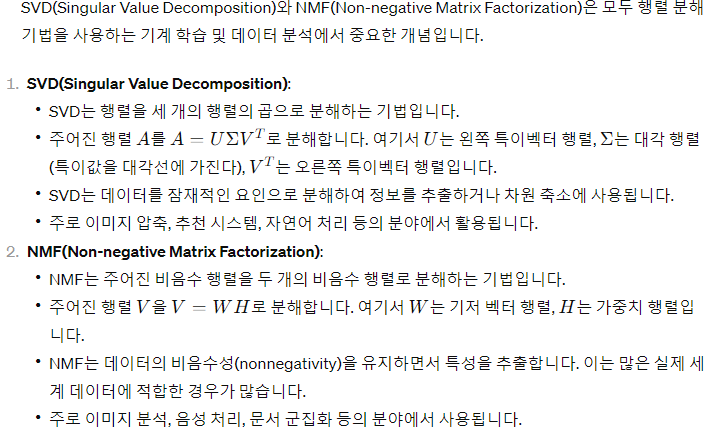

- SVD

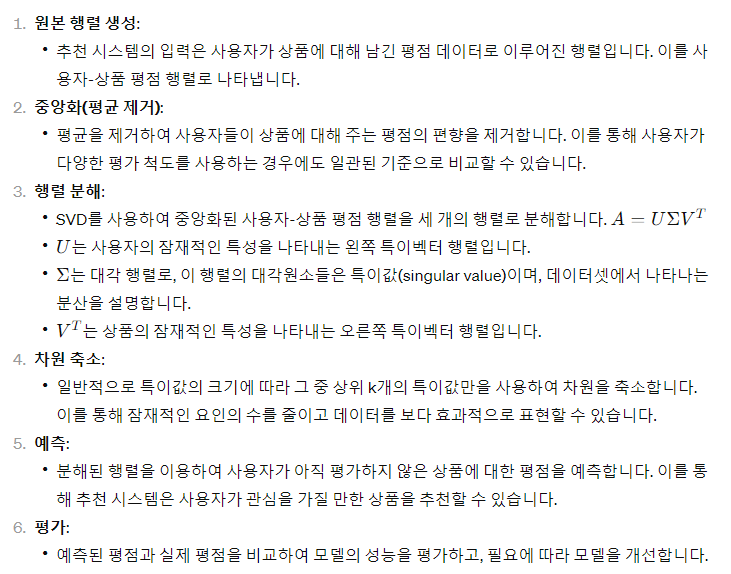

- NMF

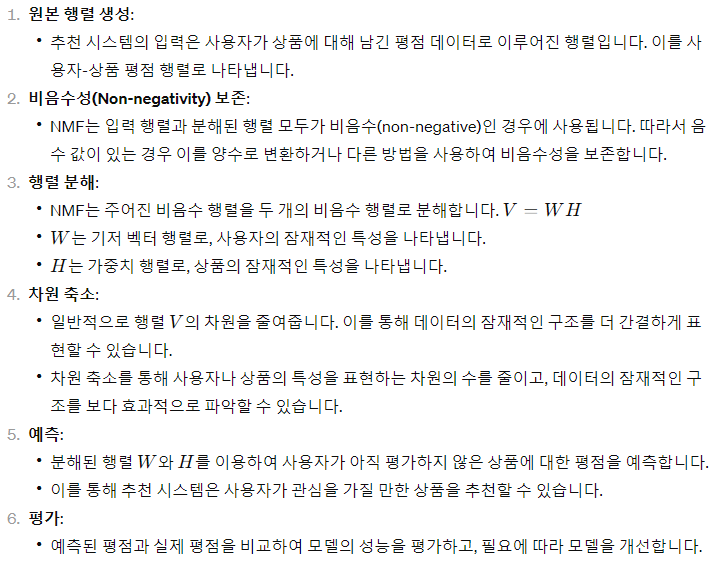

Embeddings란?

임베딩이란 고차원 벡터를 저차원 벡터로 변환한 결과를 말한다

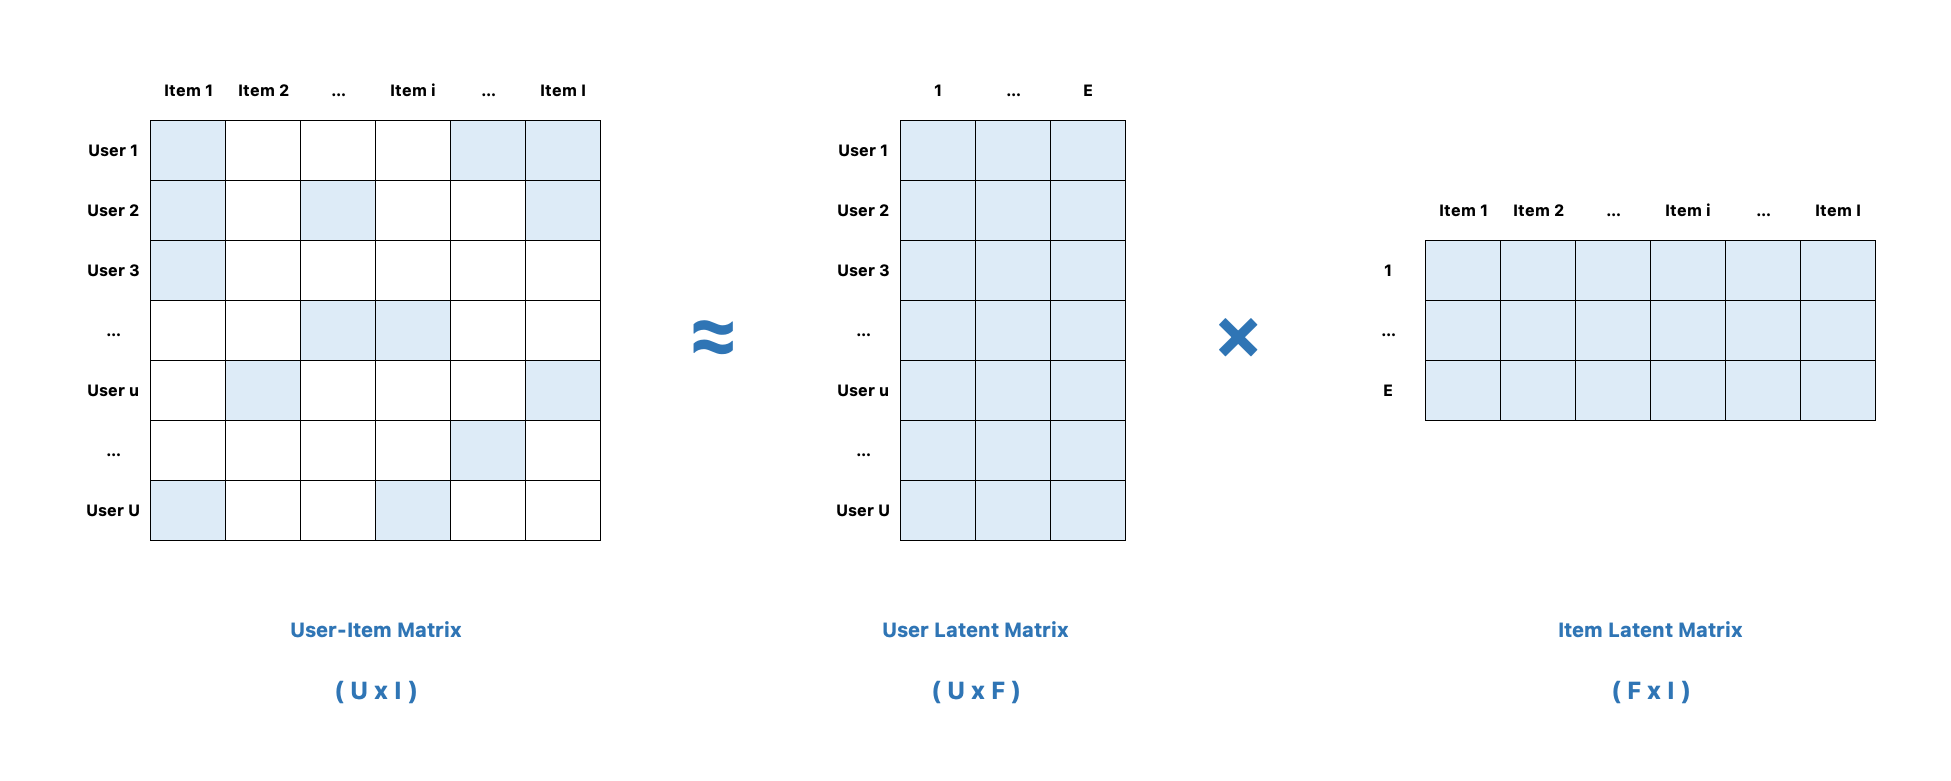

위 그림의 첫번째 그림인 2차원 벡터 공간이 아닌 두번째, 세번째 1차원 벡터 공간의 곱으로 표현하여 행렬 분해를 하게 되면 데이터를 저장하는 데 필요한 공간. 즉, 메모리 크기를 줄일 수 있다는 장점을 가지게 된다.

> ### **확률적 경사 하강법(SGD)을 이용한 행렬 분해**

- [잠재 요인 협업 필터링](https://greeksharifa.github.io/machine_learning/2019/12/17/Recommendation-System/)
- [L2 규제](https://seongyun-dev.tistory.com/52)

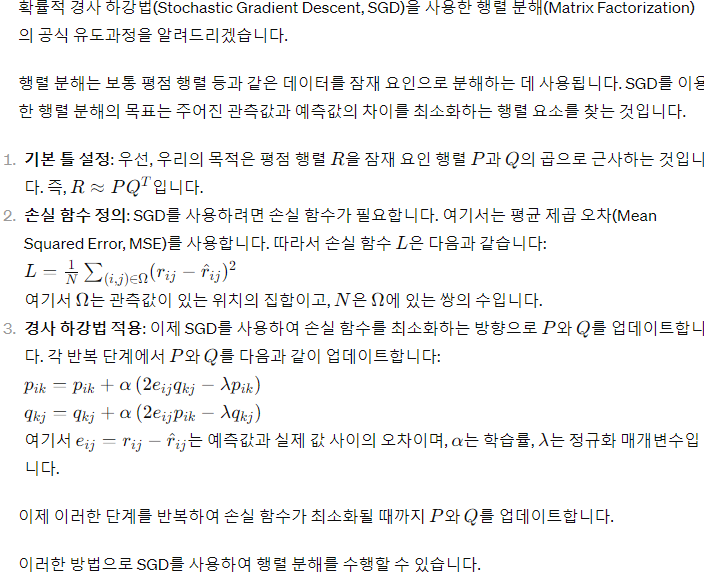

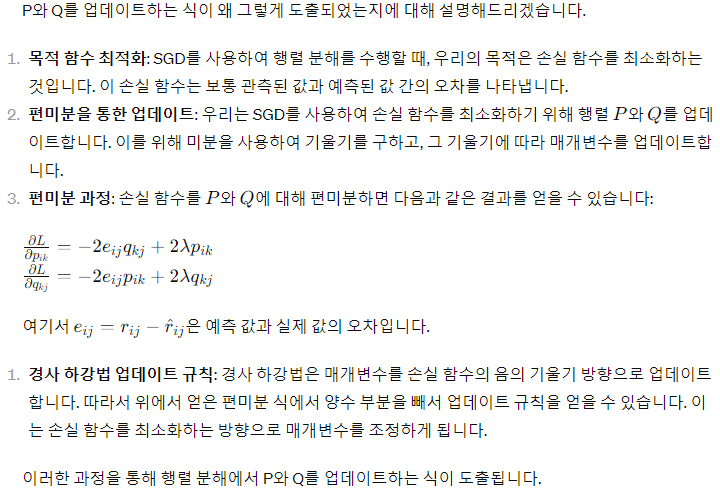

In [8]:
# SGD 행렬 분해
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q는 정규분포를 가진 랜덤 값으로 초기화, 잠재요인 차원 K는 3 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])

# 행렬 분해 뒤 다시 P와 Q.T의 내적으로 예측 행렬을 만드는 예제
num_users, num_items = R.shape
K = 3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
# scale 매개변수 : 생성된 값들의 표준편차
# scale=1.은 1을 실수로 표현한 것
Q = np.random.normal(scale = 1./K, size = (num_items, K))

> 예측 R 행렬은 P와 Q 행렬의 곱으로 얻어지는데, 이 때 실제 R 행렬에서 값이 존재하는 부분은 예측값과 비교할 수 있습니다. 하지만 Null 값인 부분은 실제값이 존재하지 않기 때문에 비교 대상이 없습니다. 이 경우 일반적으로 실제값이 Null인 부분은 비용 함수의 계산에서 제외됩니다. **다시 말해, 비용 함수는 오직 실제 R 행렬에서 값이 있는 부분에 대해서만 예측값과의 차이를 계산하고, Null 값인 부분은 무시합니다. 이렇게 함으로써 모델은 실제 데이터에 있는 정보만을 기반으로 학습하고 예측을 수행하게 됩니다.**

In [14]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeroes):
  error = 0
  # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]

  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [15]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

In [16]:
non_zeros

[(0, 0, 4.0),
 (0, 3, 2.0),
 (1, 1, 5.0),
 (1, 3, 3.0),
 (1, 4, 1.0),
 (2, 2, 3.0),
 (2, 3, 4.0),
 (2, 4, 4.0),
 (3, 0, 5.0),
 (3, 1, 2.0),
 (3, 2, 1.0),
 (3, 3, 2.0)]

In [17]:
steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

  rmse = get_rmse(R, P, Q, non_zeros)
  if (step % 50) == 0:
    print("###iteration step : ", step," rmse : ", rmse)

###iteration step :  0  rmse :  3.18918148042182
###iteration step :  50  rmse :  0.45402815018032416
###iteration step :  100  rmse :  0.15115898740988798
###iteration step :  150  rmse :  0.07269965774474761
###iteration step :  200  rmse :  0.04246278530171508
###iteration step :  250  rmse :  0.028877999722529205
###iteration step :  300  rmse :  0.022445550468807092
###iteration step :  350  rmse :  0.01941119544259796
###iteration step :  400  rmse :  0.017983693814787722
###iteration step :  450  rmse :  0.017300739181608054
###iteration step :  500  rmse :  0.01696414305881992
###iteration step :  550  rmse :  0.01679180856587657
###iteration step :  600  rmse :  0.016698502933064078
###iteration step :  650  rmse :  0.016642938601229205
###iteration step :  700  rmse :  0.016604553140343092
###iteration step :  750  rmse :  0.016572993477699346
###iteration step :  800  rmse :  0.016543116786402284
###iteration step :  850  rmse :  0.016512497103841957
###iteration step :  900

**예측 값 확인**

In [18]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬 : \n', np.round(pred_matrix, 3))

예측 행렬 : 
 [[3.991 0.897 1.306 2.002 1.663]
 [6.695 4.978 0.978 2.981 1.003]
 [6.676 0.392 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.141]]


> 사용자들과 잠재요인간의 관계 행렬과 잠재요인과 개별 item에 대한 관계 행렬을 SGD를 통해 구한 후, 이 두 행렬을 곱해주어서(내적), 기존의 Null 값이 많았던 희소 행렬을 예측

>